In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

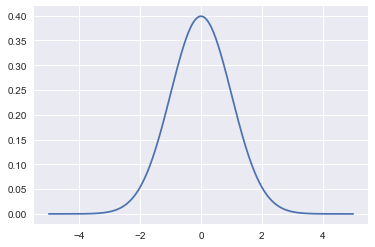

In [3]:
# borrowed from https://emredjan.github.io/blog/2017/07/19/plotting-distributions/
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
y = stats.norm.pdf(x, mu, sigma) 
norm = plt.plot(x, y)

In [4]:
len(y)

5000

In [5]:
np.percentile(y, 2.5)

2.742870427817322e-06

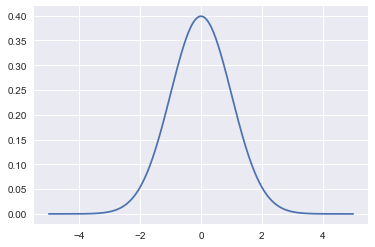

In [6]:
y2 = stats.norm.pdf(x, mu, sigma) 
second_norm = plt.plot(x, y2)

In [7]:
np.percentile(y2, 2.5)

2.742870427817322e-06

In [8]:
np.percentile(y, 5)

5.028322955201841e-06

In [9]:
np.percentile(y2, 95)

0.38657606670920003

In [10]:
np.percentile(y2, 9.5)

1.4220195476848205e-05

In [11]:
np.percentile(y2, .95)

1.8784213819232096e-06

In [12]:
np.percentile(y2, 50)

0.017506443234162665

In [13]:
np.percentile(y2, 90)

0.3519067112354228

In [14]:
max(y)

0.39894208085053

In [15]:
min(y)

1.4867195147342979e-06

In [16]:
y

array([1.48671951e-06, 1.50166129e-06, 1.51674717e-06, ...,
       1.51674717e-06, 1.50166129e-06, 1.48671951e-06])

In [17]:
y_new = stats.norm.rvs(1000)

In [18]:
len(y_new)

TypeError: object of type 'numpy.float64' has no len()

In [19]:
y_new

1000.874356934479

In [20]:
y_new = stats.norm.rvs(0, 1, 1000)

In [21]:
len(y_new)

1000

In [22]:
np.mean(y_new)

0.034865512836394996

In [23]:
np.percentile(y_new, 95)

1.5962770630284364

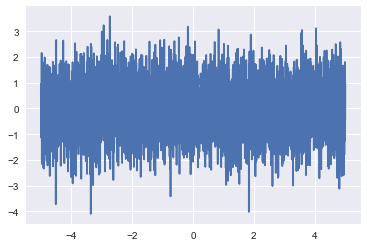

In [25]:
# that's more fucking like it.
# so don't try to plot the norm object in general, plot the random variables from it.
y_proper = stats.norm.rvs(0, 1, 5000)
proper_norm = plt.plot(x, y_proper)

(array([   4.,   26.,  160.,  562., 1187., 1513., 1040.,  417.,   82.,
           9.]),
 array([-4.09692318, -3.32877495, -2.56062672, -1.79247848, -1.02433025,
        -0.25618202,  0.51196622,  1.28011445,  2.04826268,  2.81641092,
         3.58455915]),
 <a list of 10 Patch objects>)

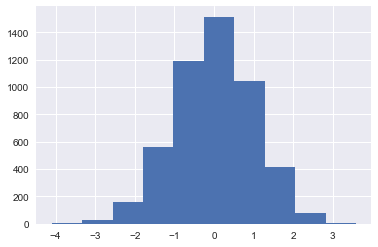

In [26]:
plt.hist(y_proper)

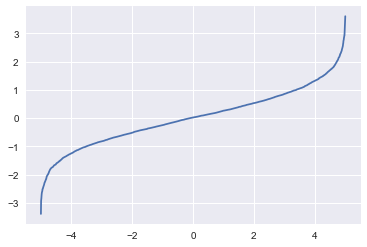

In [27]:
# ok this is really confusing.  so the plot function draws a curve if you pass it the pdf, but won't if you just pass it data... guess that makes sense. 
# wait, what if I sort it. 
y_proper = stats.norm.rvs(0, 1, 5000)
proper_norm = plt.plot(x, np.sort(y_proper))

In [28]:
# that looks kinda like the CDF. I'm so confused by this. 
stats.norm.ppf(.95, loc=0, scale=1)	

1.6448536269514722

In [29]:
# well that's right at least.
stats.norm.ppf(.975, loc=0, scale=1)

1.959963984540054

In [30]:
stats.norm.ppf(.997, loc=0, scale=1)

2.7477813854449926

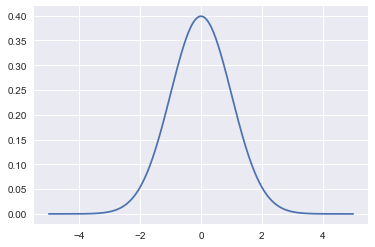

In [31]:
# ok, I'm going to accept that I don't fully know what the plot function is doing here and just 
# run with what I get re: the correct answers.  Matplotlib is full of dark corners. 
# So: new plan: 

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
y = stats.norm.pdf(x, mu, sigma) 
norm = plt.plot(x, y)

In [32]:
# then I'll want vertical lines at: 
right_vertical = stats.norm.ppf(.975, loc=0, scale=1)
left_vertical = stats.norm.ppf(0.025, loc=0, scale=1)

In [33]:
right_vertical

1.959963984540054

In [34]:
left_vertical

-1.9599639845400545

In [36]:
# so what I want to do is draw the chart this way.  then show them by using numpy percentiles 
# around the random variables --- stats.norm.rvs then numpy percentiles --- that it's correct.
# and show histogram too. 
# maybe refer them to a critical values table like this one http://www.ltcconline.net/greenl/java/Statistics/HypTestProportion/hypTestProp.html 
norm

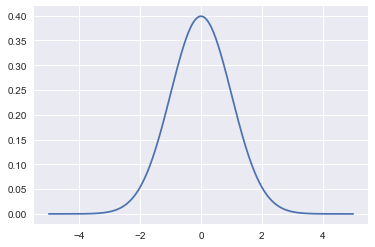

In [37]:
plt.plot(x, y)

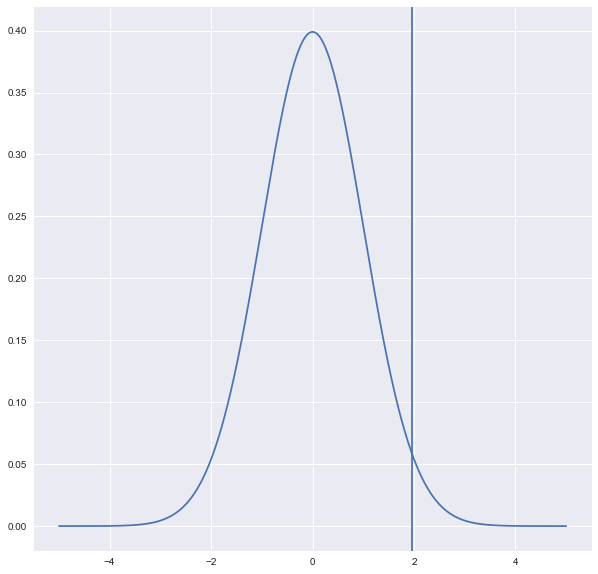

In [40]:
# let's try and draw a vertical line now. 
# also ref for norm: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.axvline(x=1.959963984540054)

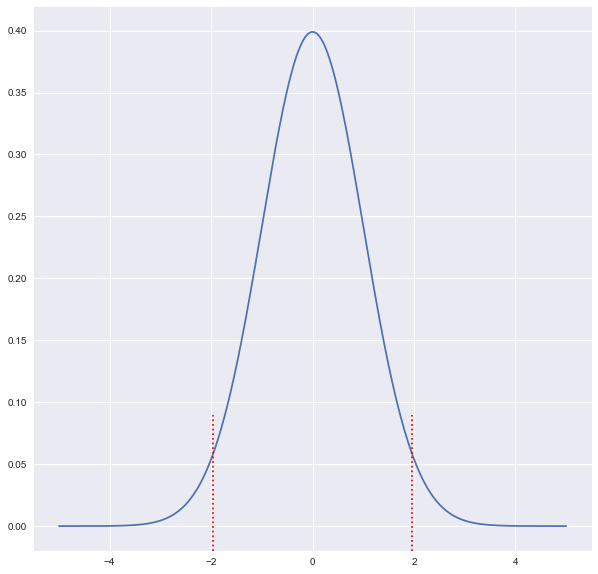

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.axvline(x=stats.norm.ppf(.975, loc=0, scale=1), linestyle=':', color="red", ymax=.25)
ax.axvline(x=stats.norm.ppf(.025, loc=0, scale=1), linestyle=':', color="red", ymax=.25)

In [47]:
ax.get_ylim()

(-0.019945542987036033, 0.4188891105570808)

In [78]:
# so something like this should work: 

def show_normal_percentiles(mean=0, sigma=1, tail=2, p=0.05):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    x = np.linspace(-5, 5, 5000)
    y = stats.norm.pdf(x, mean, sigma) 
    ax.plot(x, y)
    top_of_graph = ax.get_ylim()[1]
    top_of_line_percent = (p / top_of_graph) * 1.20
    if tail == 1:
        ax.axvline(x=stats.norm.ppf(1-p, loc=mean, scale=sigma), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
    else:
        left_p = p / 2
        right_p = 1 - left_p
        ax.axvline(x=stats.norm.ppf(left_p, loc=mean, scale=sigma), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
        ax.axvline(x=stats.norm.ppf(right_p, loc=mean, scale=sigma), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
    return fig

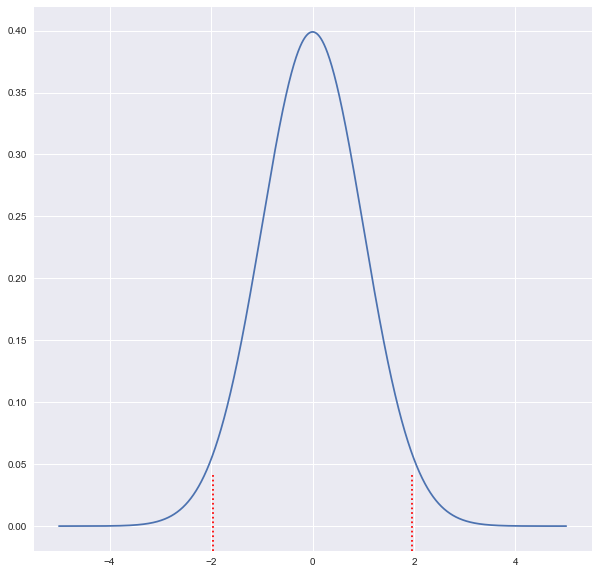

In [77]:
f = show_percentiles()

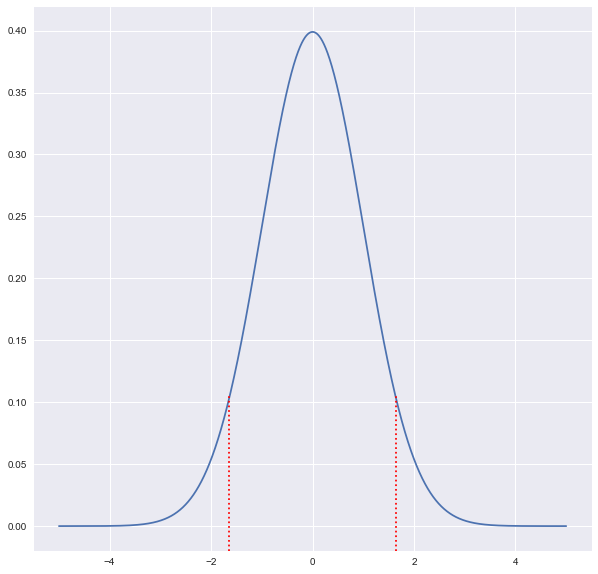

In [72]:
f = show_percentiles(p=0.1)

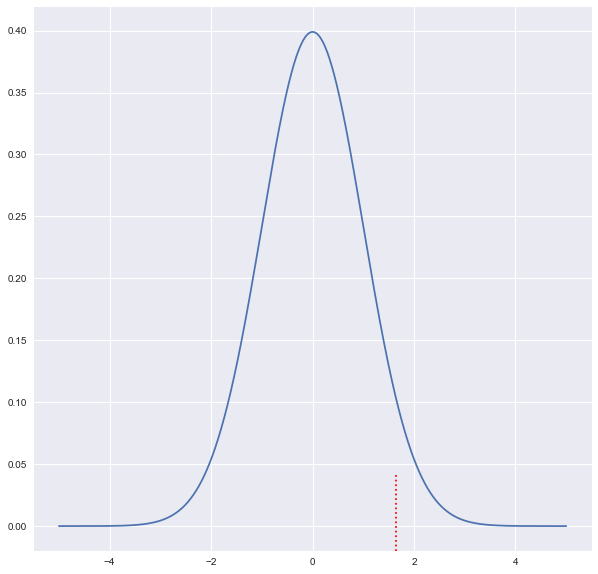

In [73]:
f = show_percentiles(tail=1)

In [80]:
# I could generalize this out, so long as I pass a kwargs for the parameters of the distribution.

# so something like this should work: 

def show_percentiles(parameters, distribution = stats.norm, tail=2, p=0.05):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    x = np.linspace(-5, 5, 5000)
    try:
        y = distribution.pdf(x, **parameters) 
    except:
        y = distribution.pmf(x, **parameters)
    ax.plot(x, y)
    top_of_graph = ax.get_ylim()[1]
    top_of_line_percent = (p / top_of_graph) * 1.20
    if tail == 1:
        ax.axvline(x=distribution.ppf(1-p, **parameters), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
    else:
        left_p = p / 2
        right_p = 1 - left_p
        ax.axvline(x=distribution.ppf(left_p, **parameters), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
        ax.axvline(x=distribution.ppf(right_p, **parameters), 
                   linestyle=':', 
                   color="red", 
                   ymax=top_of_line_percent)
    return fig

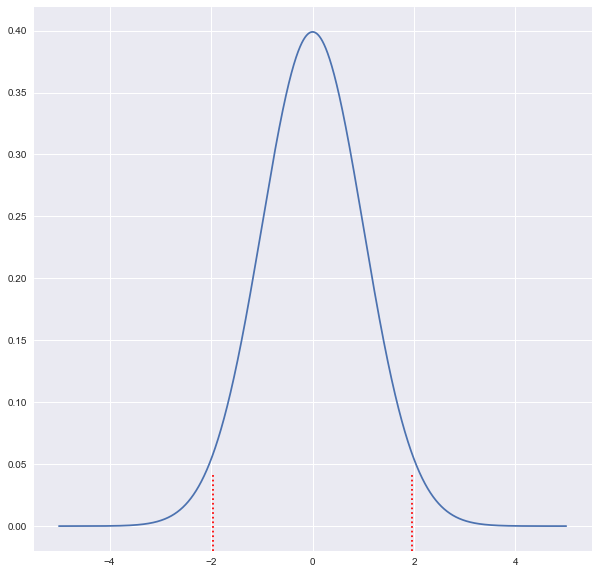

In [83]:
norm = show_percentiles({"loc":0, "scale":1})

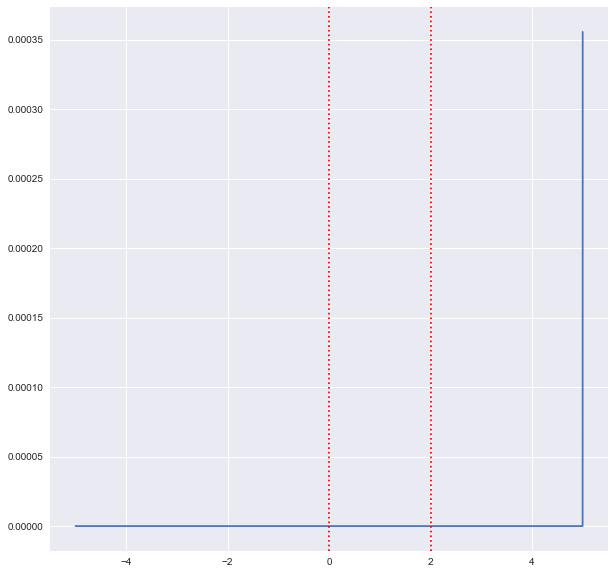

In [85]:
poisson = show_percentiles({"mu":0.6}, distribution = stats.poisson)

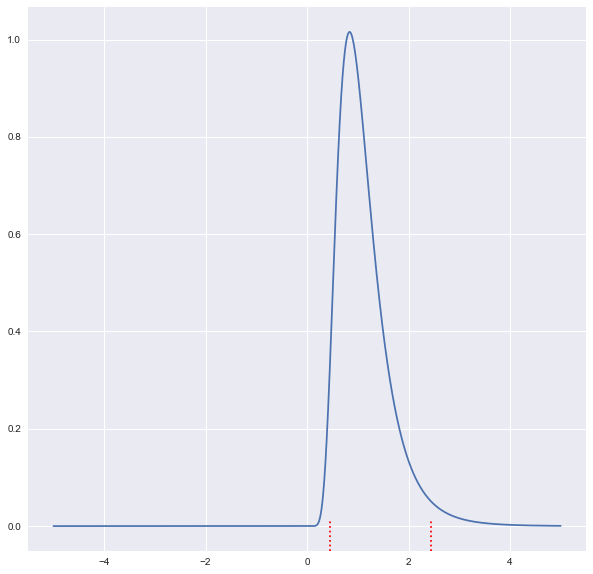

In [86]:
f = show_percentiles({"dfn":29, "dfd":18}, distribution = stats.f)

In [92]:
# ok that doesn't really work, but I can stick to the normal one for now.  let's try to fill some lines
# this SO suggests https://stackoverflow.com/questions/46375553/standard-normal-distribution-in-python, 
# as far as I can decipher, filtering the numpy array to do it.  Leseee... start by replicating that result
def draw_z_score(x, cond, mu, sigma, title):
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

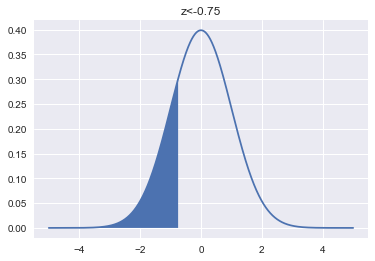

In [94]:
x = np.linspace(-5, 5, 5000)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

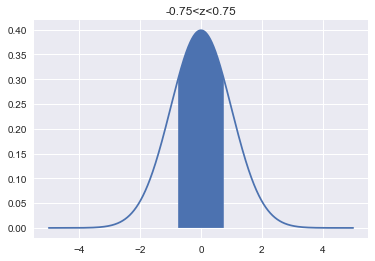

In [96]:
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')


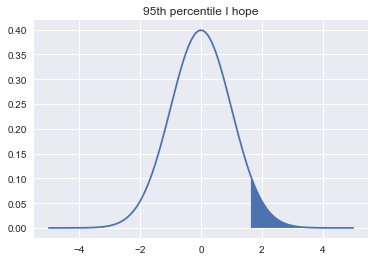

In [99]:
z0 = 1.64
draw_z_score(x, x > z0, 0, 1, '95th percentile I hope')


In [113]:
# sweet, that works. Let's integrate it shall we?

def shade_percentiles(mean = 0, sigma = 1, tail=2, p=0.05):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    x = np.linspace(-5, 5, 5000)
    y = stats.norm.pdf(x, mean, sigma) 
    ax.plot(x, y)
    if tail == 1:
        critical_value = stats.norm.ppf(1-p, loc=mean, scale=sigma)
        print(critical_value)
        cond = x > critical_value
        z = x[cond]
        ax.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    else:
        left_p = p / 2
        right_p = 1 - left_p
        right_critical = stats.norm.ppf(right_p, loc=mean, scale=sigma)
        cond1 = x >  right_critical
        print(right_critical)
        left_critical = stats.norm.ppf(left_p, loc=mean, scale=sigma)
        cond2 = x < left_critical
        z1 = x[cond1]
        z2 = x[cond2] 
        ax.fill_between(z2, 0, stats.norm.pdf(z2, mu, sigma))
        ax.fill_between(z1, 0, stats.norm.pdf(z1, mu, sigma))
    return fig

1.959963984540054


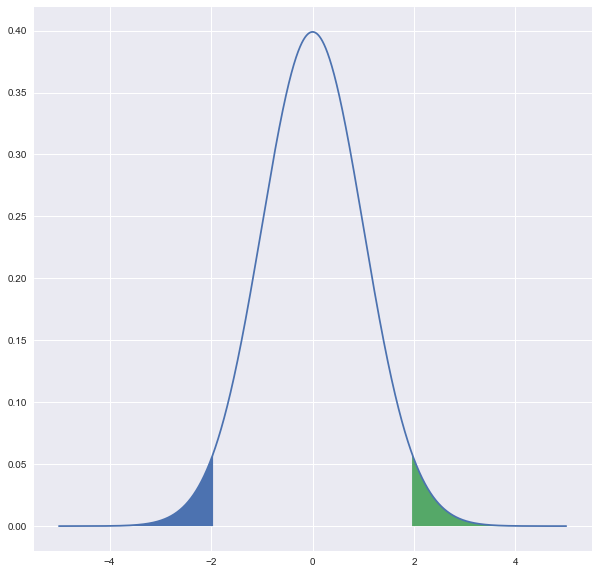

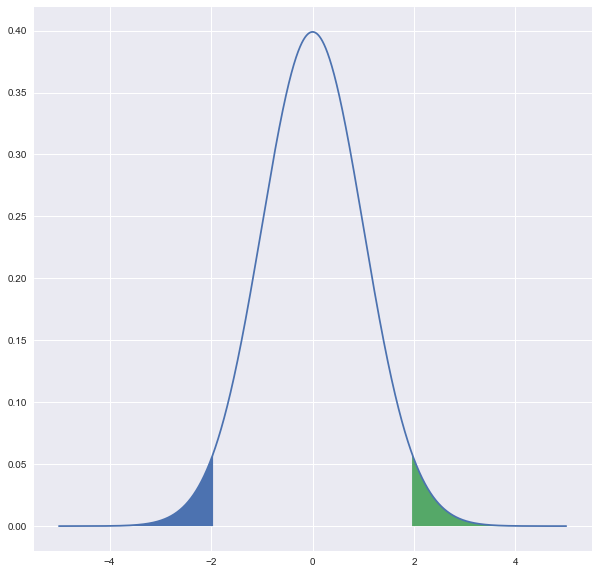

In [114]:
shade_percentiles()

1.6448536269514722


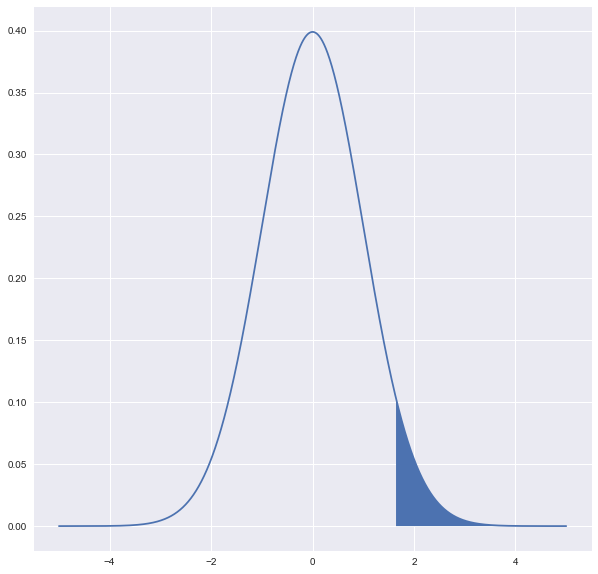

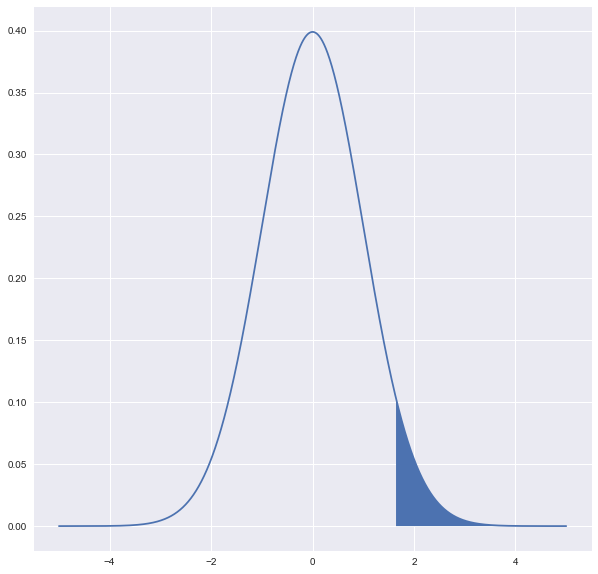

In [115]:
shade_percentiles(tail=1)

In [ ]:
# correct.  boom.